In [1]:
##########################################################################
# Created on Sat Nov 17 22:44:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 13.1.1.Abstract financial market

In [7]:
par_ppn=100
par_bond=100
price_bond=96
price_call=0.4
K=5.0

N_bond=par_ppn/par_bond
N_call=(par_ppn-N_bond*price_bond)/price_call

print('To synthesis Principal-Protected Notes, Buy #of risk free bond is ',N_bond)
print('To synthesis Principal-Protected Notes, Buy #of call option is ',N_call)

To synthesis Principal-Protected Notes, Buy #of risk free bond is  1.0
To synthesis Principal-Protected Notes, Buy #of call option is  10.0


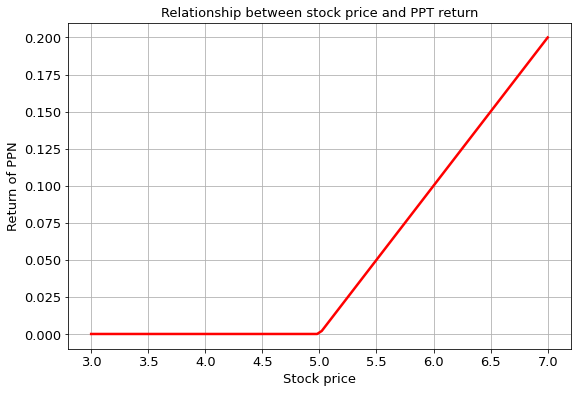

In [8]:
import numpy as np
import matplotlib.pyplot as plt

price_z_list=np.linspace(3,7,100)
profit_call=np.maximum(price_z_list-K,0)
profit_ppn=N_bond*par_bond+N_call*profit_call-par_ppn
return_ppn=profit_ppn/par_ppn

plt.figure(figsize=(9,6))
plt.plot(price_z_list,return_ppn,'r-',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Return of PPN',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and PPT return',fontsize=13)
plt.grid()
plt.show()

# 13.1.2.Real financial market

In [1]:
par_PPN=1e8
par_SC=100
coupon=0.0373

price_SC=102.2682
price_opt=0.2230
price_300ETF=4.8207
K_300ETF=5.0
price_HS300=4755.85

N1=10 #Trading unit of bond
N2=10000 #Contract unit per option

cashflow_SC=par_SC*(1+coupon)

from math import ceil

N_SC=N1*ceil(par_PPN/(N1*cashflow_SC))
print('Number of bond needed to be traded is ',N_SC)

Number of bond needed to be traded is  964050


In [2]:
N_opt=(par_PPN-price_SC*N_SC)/(price_opt*N2)
N_opt=int(N_opt)
print('Number of option needed to be traded is ',N_opt)

Number of option needed to be traded is  631


In [3]:
cash=par_PPN-price_SC*N_SC-N_opt*price_opt*N2
print('Cash remaining is ',round(cash,2))

Cash remaining is  1211.79


In [6]:
K_HS300=K_300ETF*price_HS300/price_300ETF
print('HS300 when price of 300ETF equals to strike price is ',round(K_HS300,2))

HS300 when price of 300ETF equals to strike price is  4932.74


In [9]:
HS300_chg=np.array([0.05,0.1,0.2,0.3])
profit_opt=N_opt*N2*np.maximum(price_300ETF*(1+HS300_chg)-K_300ETF,0)
profit_PPN=cashflow_SC*N_SC+cash+profit_opt-par_PPN
R_PPN=profit_PPN/par_PPN
print('Return of PPN when HS300 rises 5%',round(R_PPN[0],6))
print('Return of PPN when HS300 rises 10%',round(R_PPN[1],6))
print('Return of PPN when HS300 rises 20%',round(R_PPN[2],6))
print('Return of PPN when HS300 rises 30%',round(R_PPN[-1],6))

Return of PPN when HS300 rises 5% 0.003917
Return of PPN when HS300 rises 10% 0.019126
Return of PPN when HS300 rises 20% 0.049545
Return of PPN when HS300 rises 30% 0.079963


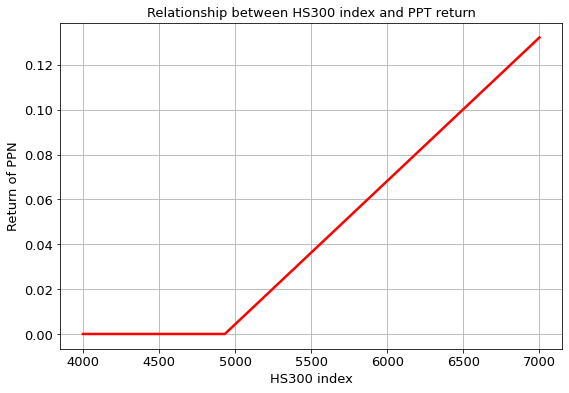

In [11]:
HS300_list=np.linspace(4000,7000,500)
price_300ETF_list=HS300_list*(price_300ETF/price_HS300)
profit_opt_list=N_opt*N2*np.maximum(price_300ETF_list-K_300ETF,0)
profit_PPN_list=cashflow_SC*N_SC+cash+profit_opt_list-par_PPN
R_PPN_list=profit_PPN_list/par_PPN

plt.figure(figsize=(9,6))
plt.plot(HS300_list,R_PPN_list,'r-',lw=2.5)
plt.xlabel('HS300 index',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Return of PPN',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between HS300 index and PPT return',fontsize=13)
plt.grid()
plt.show()